Running ml_logreg
Running ml_knn
Running ml_randfor
Running ml_xgb
Running ml_stacking
task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    ----
    MEAN:     [0.58705117] + [0.01764002]
    FULL:     [0.58704907]

model  1:     [SVC]
    ----
    MEAN:     [0.52565476] + [0.00187664]
    FULL:     [0.52565539]

model  2:     [KNeighborsClassifier]
    ----
    MEAN:     [0.57315665] + [0.01399965]
    FULL:     [0.57315707]


	BTC_ETH

Retorno del mercacdo: 131.472
Retorno ml_logreg 97.5005300203
Retorno ml_knn 26.196077518
Retorno ml_randfor 60.3041184722
Retorno ml_xgb 61.0164788121
Retorno ml_stacking 71.661496855


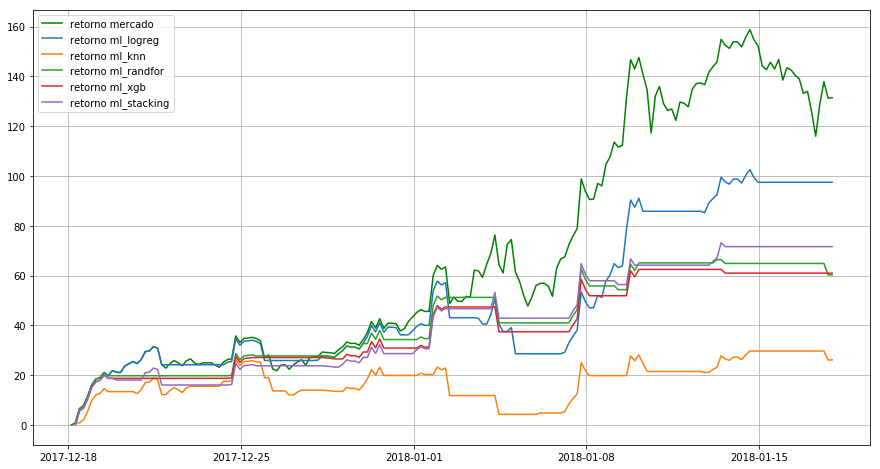

In [17]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="BTC_ETH"


start=string2ts("2017-12-18 00:00:00")
end=string2ts("2018-01-18 00:00:00")
period=3600*4

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.96
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)


strategies = ["ml_logreg", "ml_knn", "ml_randfor", "ml_xgb", "ml_stacking"]

list_profit = []
list_v = []

for strategy in strategies:
    
    print "Running",strategy
    w, t = run_strategy(strategy, df12, pair, True, per)
    relativeReturn,v = profit(w)
    
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label='retorno '+strategy)

plt.legend(loc='best')
plt.grid()